In [2]:
import web3

import sys,os,os.path
os.environ['WEB3_INFURA_PROJECT_ID']='29e0de967f19435d988d295fcb8a274b'

from tqdm import tqdm

from web3.auto.infura import w3

In [3]:

num_from = 8957400
num_until = 8958400

gwei_for_block = 2000000000

#blocks_dict = {}

In [4]:
#Comission (in gwei = 10^9 wei) for every single block
def calculate_gv(current_block):
    current_transactions = current_block['transactions']
    sum = 0
    for i in range(len(current_transactions)):
        transaction_atrs = w3.eth.getTransaction(current_transactions[i])
        gv = transaction_atrs['gas'] * transaction_atrs['gasPrice']
        sum = sum + gv
    return sum

In [5]:
#First step of our calculations - get list of blocks
blocks_dict = {}
def get_blocks(num_from, num_until):
    for number in tqdm(range(num_from, num_until)):
        blocks_dict[number] = w3.eth.getBlock(number)
    return len(blocks_dict)

In [6]:
get_blocks(num_from, num_until)

100%|██████████| 1000/1000 [03:12<00:00,  5.19it/s]


1000

In [7]:
#Second step is count gv for every single block
gv_dict = {}
def to_gv_dict(blocks_dict):
    for number in tqdm(range(num_from, num_until)):
        gv_dict[number] = calculate_gv(blocks_dict[number])
    return len(gv_dict)

In [8]:
to_gv_dict(blocks_dict)


100%|██████████| 1000/1000 [4:29:48<00:00, 16.19s/it] 


1000

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (25,15)

In [10]:
from sklearn.linear_model import LinearRegression

def l_r(x, y):
    x = np.array(x).reshape((-1,1))#Модуль требует вектор столбец
    y = np.array(y)
    model = LinearRegression()
    model.fit(x, y)
    r_sq = model.predict(x)
    return r_sq

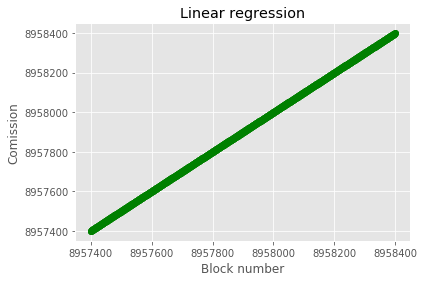

In [11]:
#Linear regression of comissions
import numpy as np
gv_list = list(gv_dict)
plt.plot(range(num_from,num_until), gv_list, 'go')
plt.title('Linear regression')
plt.xlabel('Block number')
plt.ylabel('Comission')
predicted_response=l_r(range(num_from, num_until), gv_list)
plt.plot(range(num_from, num_until), predicted_response, 'g-')

Text(0, 0.5, 'Percentage')

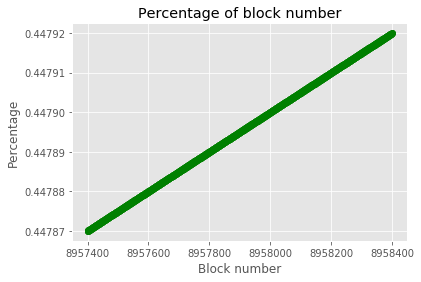

In [13]:
#Percentage (comission/gain*100)
perc_list = []
for i in gv_list:
    perc_list.append(i/gwei_for_block*100)
plt.plot(range(num_from,num_until), perc_list, 'go')
plt.title('Percentage of block number')
plt.xlabel('Block number')
plt.ylabel('Percentage')


In [14]:


p = 1/len(gv_list)

import math



def calculation(gv_list):
    M = 0
    D = 0
    Q = 0
    Me = 0
    for i in gv_list:
        M = M + p*i
    for i in gv_list:
        D = (i - M) * (i - M)
    D = D * p
    Q = math.sqrt(D)
    Me = (max(gv_list) + min(gv_list))/2
    print(M)
    print(Me)
    print(Q)
    print(p)
    

In [15]:
calculation(gv_list)

8957899.499999998
8957899.5
15.795576912599957
0.001
